In [1]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

import numpy as np
import matplotlib.pyplot as plt

import os

%matplotlib inline

In [2]:
class Dataset:
    def __init__(self):
        self.label_count = 0
        self.images = np.array([])
        self.labels = np.array([])
        self.image_size = 0
        self.names = {}

    def addImages(self, name, perc = 1.0):
        images = np.load(name) / 255
        images_len = int(len(images) * perc)
        images = images[:images_len]

        label = np.append(np.zeros(self.label_count), 1)
        labels = np.tile(label, (len(images), 1))
        self.names[self.label_count] = name.split('/')[-1][:-4]

        if self.images.size:
            z = np.zeros((self.labels.shape[0], 1))
            self.labels = np.concatenate((self.labels, z), axis=1)

            self.images = np.concatenate((self.images, images), axis=0)
            self.labels = np.concatenate((self.labels, labels), axis=0)
        else:
            self.images = images
            self.labels = labels

        self.label_count += 1
        self.image_size = self.images.shape[1]
        print("LOADED SUCCESSFULLY! :", name)
    
    def shuffleDatas(self):
        shuffle_i = np.arange(len(self.images))
        np.random.shuffle(shuffle_i)

        self.images = self.images[shuffle_i]
        self.labels = self.labels[shuffle_i]

    def splitDatas(self,train_perc=0.75):
        train_len = int(self.images.shape[0] * train_perc)

        train_images, test_images = np.split(self.images, [train_len])
        train_labels, test_labels = np.split(self.labels, [train_len])

        return (train_images, train_labels), (test_images, test_labels)

    def addImagesFromDir(self, ds_dir, perc=1.0):
        for path, subdirs, files in os.walk(ds_dir): pass

        for file_name in files:
            if file_name[0] == '.': continue
    
            self.addImages(ds_dir + file_name, perc=perc)


In [3]:
ds_dir = 'images/'

ds = Dataset()

ds.addImagesFromDir(ds_dir, perc=0.50)

ds.shuffleDatas()

train, test = ds.splitDatas(train_perc=0.90)

LOADED SUCCESSFULLY! : images/apple.npy
LOADED SUCCESSFULLY! : images/airplane.npy
LOADED SUCCESSFULLY! : images/laptop.npy
LOADED SUCCESSFULLY! : images/banana.npy
LOADED SUCCESSFULLY! : images/star.npy
LOADED SUCCESSFULLY! : images/rainbow.npy
LOADED SUCCESSFULLY! : images/TheEiffelTower.npy
LOADED SUCCESSFULLY! : images/bridge.npy


In [6]:
input_size = ds.image_size
output_size = ds.label_count

model = Sequential()
model.add(Dense(256, activation='relu', input_dim = input_size))
model.add(Dense(256, activation='relu'))
model.add(Dense(output_size, activation='softmax'))

model.compile(loss='categorical_crossentropy', 
            optimizer='adam',
            metrics=['accuracy'])

In [7]:
train_images, train_labels = train
test_images, test_labels = test

epochs = 1

history = model.fit(train_images, train_labels, 
                    epochs=epochs,
                    validation_data=(test_images, test_labels))

Train on 629123 samples, validate on 69903 samples
629123/629123 [==============================] - 123s 195us/sample - loss: 0.2642 - accuracy: 0.9148 - val_loss: 0.2354 - val_accuracy: 0.9243


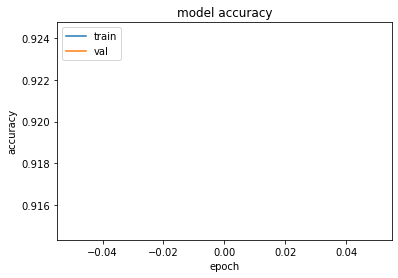

In [8]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [9]:
names = ds.names

def predictImage(i):
    test_image = np.array([ds.images[i]])

    prediction = model.predict(test_image)
    name_i = np.argmax(prediction)

    print("Doodle =", names[name_i])

    test = ds.images[i]
    test = 255 - test * 255
    d = int(np.sqrt(test.shape[0]))
    resized_test = np.resize(test, (d,d))

    plt.imshow(resized_test, cmap='gray')

Doodle = banana


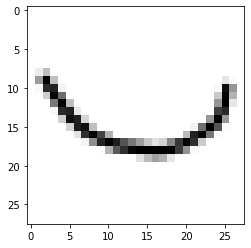

In [10]:
predictImage(2)

Doodle = apple


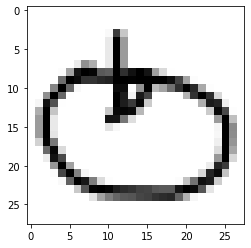

In [11]:
predictImage(1)

Doodle = TheEiffelTower


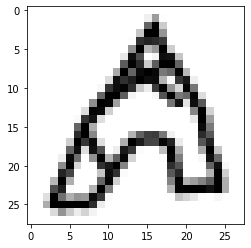

In [12]:
predictImage(60)

In [13]:
model.save("doodle_model_v1")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: doodle_model_v1/assets


2022-10-17 22:10:06.253866: W tensorflow/python/util/util.cc:299] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


In [14]:
ds.names

{0: 'apple',
 1: 'airplane',
 2: 'laptop',
 3: 'banana',
 4: 'star',
 5: 'rainbow',
 6: 'TheEiffelTower',
 7: 'bridge'}